In [15]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas
from empyrial import empyrial, Engine

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_api_key")

In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Format start and end dates as ISO format for our bond indices
tickers = ['GOLD', 'WFG', 'IP', 'ASA', 'CMC', 'GLHA']
start_date = pd.Timestamp("1990-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-20", tz="America/New_York").isoformat()

commodities_portfolio = alpaca.get_bars(
    tickers,
    timeframe="1Day",
    start = start_date,
    end = end_date
).df

In [6]:
# sets the index as a dateformat
commodities_portfolio.index = commodities_portfolio.index.date
commodities_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2015-12-01,7.18,7.4100,6.8803,7.38,97337,310,7.262090,ASA
2015-12-02,7.24,7.4399,7.1400,7.27,96037,251,7.266087,ASA
2015-12-03,7.35,7.4900,7.2400,7.40,95499,375,7.398886,ASA
2015-12-04,7.49,7.7500,7.4400,7.74,161779,400,7.619966,ASA
2015-12-07,7.64,7.6500,7.2600,7.33,137773,428,7.452271,ASA


In [7]:
#reformats the data
commodities_portfolio = commodities_portfolio.drop(columns=['open','high','low','volume','trade_count','vwap'])
GOLD_closes = commodities_portfolio[commodities_portfolio['symbol']=='GOLD'].drop('symbol', axis=1)
WFG_closes = commodities_portfolio[commodities_portfolio['symbol']=='WFG'].drop('symbol', axis=1)
IP_closes = commodities_portfolio[commodities_portfolio['symbol']=='IP'].drop('symbol', axis=1)
ASA_closes = commodities_portfolio[commodities_portfolio['symbol']=='ASA'].drop('symbol', axis=1)
CMC_closes = commodities_portfolio[commodities_portfolio['symbol']=='CMC'].drop('symbol', axis=1)
GLHA_closes = commodities_portfolio[commodities_portfolio['symbol']=='GLHA'].drop('symbol', axis=1)
commodities_portfolio_close = pd.concat([GOLD_closes, WFG_closes, IP_closes, ASA_closes,
CMC_closes, GLHA_closes],axis=1, keys=['GOLD', 'WFG', 'IP', 'ASA', 'CMC', 'GLHA'])

commodities_index_all = pd.DataFrame()
commodities_index_all["GOLD"] = commodities_portfolio_close["GOLD"]["close"]
commodities_index_all["WFG"] = commodities_portfolio_close["WFG"]["close"]
commodities_index_all["IP"] =  commodities_portfolio_close["IP"]["close"]
commodities_index_all["ASA"] =  commodities_portfolio_close["ASA"]["close"]
commodities_index_all["CMC"] =  commodities_portfolio_close["CMC"]["close"]
commodities_index_all["GLHA"] =  commodities_portfolio_close["GLHA"]["close"]
commodities_index_all.head()



,GOLD,WFG,IP,ASA,CMC,GLHA
2015-12-01,63.45,NaN,41.22,7.38,15.02,NaN
2015-12-02,62.71,NaN,40.07,7.27,14.82,NaN
2015-12-03,63.03,NaN,39.61,7.40,14.62,NaN
2015-12-04,65.18,NaN,40.23,7.74,14.81,NaN
2015-12-07,62.67,NaN,39.78,7.33,14.44,NaN


In [8]:
#creates a selection widget
bond_tickers = pn.widgets.MultiChoice(name="Security List", value=['GOLD', 'WFG', 'IP', 'ASA', 'CMC', 'GLHA'],
    options=tickers)
pn.Column(bond_tickers, height=200)

BokehModel(combine_events=True, render_bundle={'docs_json': {'744525db-0148-4882-b998-3783903a3211': {'defs': …

Column(height=200)
    [0] MultiChoice(name='Security List', options=['GOLD', 'WFG', ...], value=['GOLD', 'WFG', ...])

<AxesSubplot:>

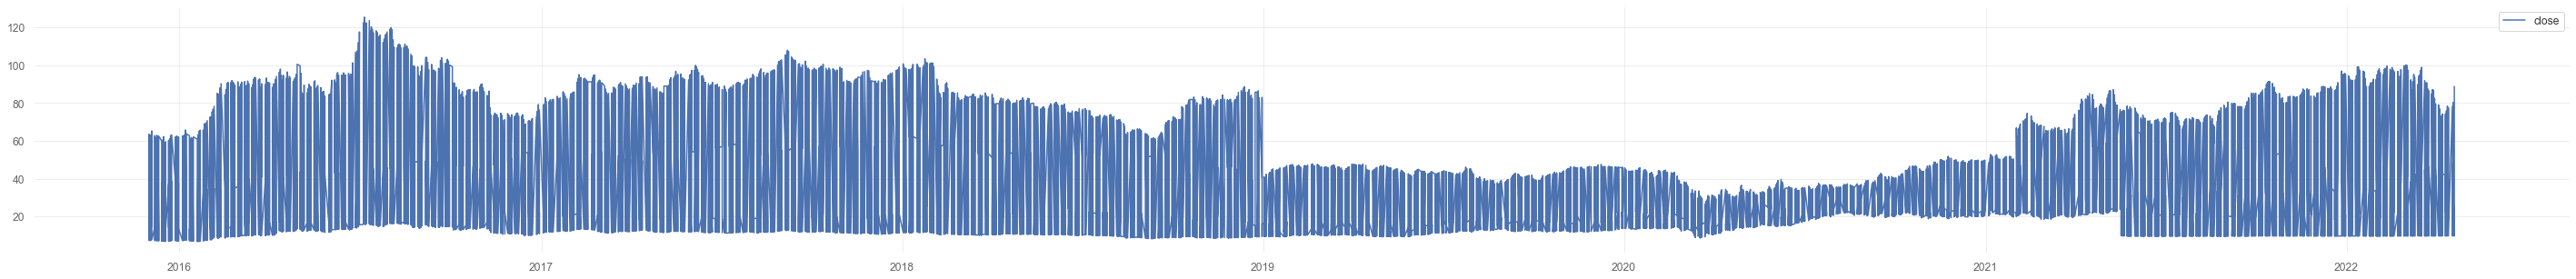

In [9]:
commodities_portfolio.plot(figsize=(50,5))

In [10]:
commodities_portfolio_close = pd.concat([GOLD_closes, WFG_closes, IP_closes, ASA_closes, CMC_closes, GLHA_closes], axis='columns', join='inner')
commodities_portfolio_close.head()

,close,close,close,close,close,close
2021-05-18,25.11,75.36,63.42,23.81,32.53,9.9
2021-05-19,24.59,75.30,62.91,23.53,31.77,9.7
2021-05-20,24.81,76.26,62.87,23.75,31.11,9.7
2021-05-21,24.70,75.91,63.53,23.79,30.83,9.7
2021-05-24,24.68,78.28,64.40,24.25,31.46,9.7


<AxesSubplot:>

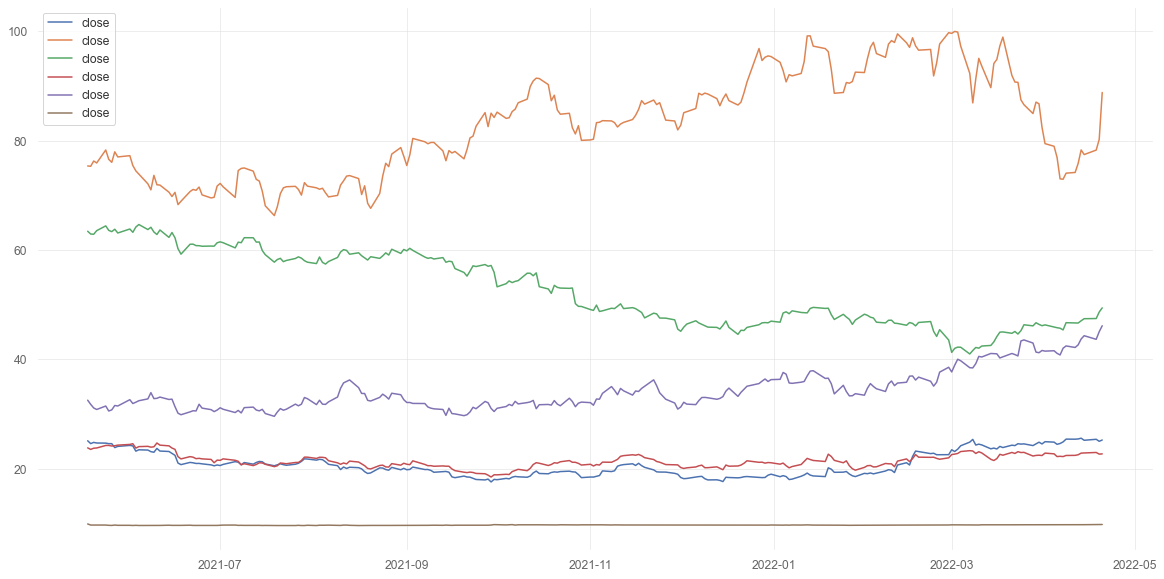

In [11]:
commodities_portfolio_close.plot(figsize=(20,10))

In [12]:
#creates a new dataframe from the widget selection
selected_commodities_indexes = commodities_index_all[bond_tickers.value]
selected_commodities_indexes

,GOLD,WFG,IP,ASA,CMC,GLHA
2015-12-01,63.45,NaN,41.22,7.38,15.02,NaN
2015-12-02,62.71,NaN,40.07,7.27,14.82,NaN
2015-12-03,63.03,NaN,39.61,7.40,14.62,NaN
2015-12-04,65.18,NaN,40.23,7.74,14.81,NaN
2015-12-07,62.67,NaN,39.78,7.33,14.44,NaN
...,...,...,...,...,...,...
2022-04-13,25.58,78.29,47.05,22.85,43.72,9.750
2022-04-14,25.20,77.44,47.43,22.88,44.32,9.765
2022-04-18,25.38,78.26,47.46,22.97,43.66,9.785
2022-04-19,25.01,80.22,48.65,22.67,45.05,9.800


<AxesSubplot:>

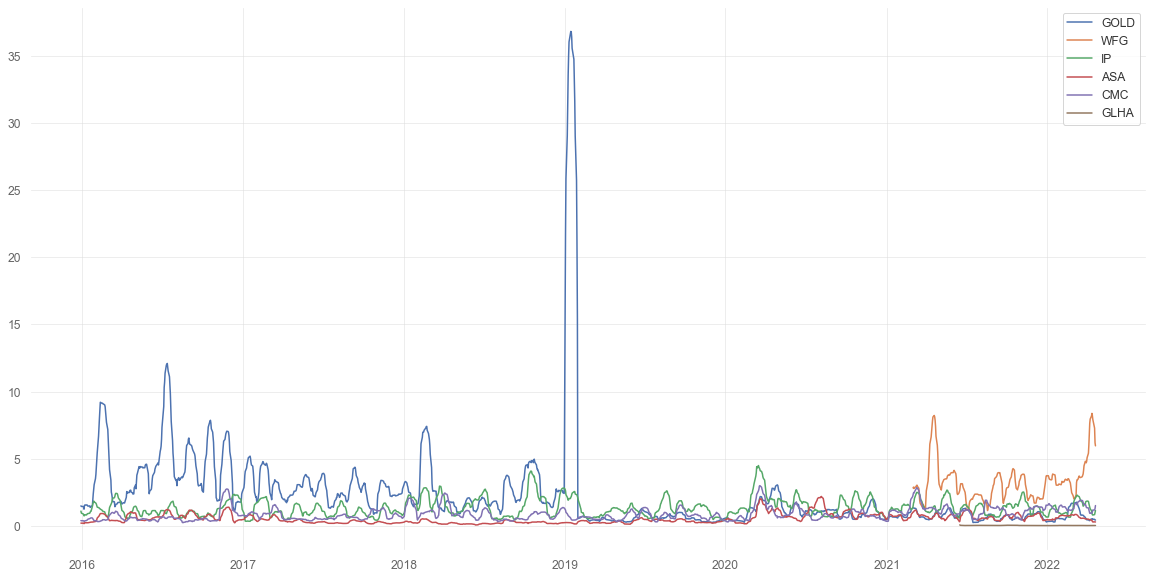

In [13]:
selected_commodities_indexes.rolling(window=21).std().plot(figsize=[20,10])

Start date: 2005-01-01
End date: 2022-04-28


,Backtest
,
Annual return,11.89%
Cumulative return,597.84%
Annual volatility,26.51 %
Winning day ratio,52.65%
Sharpe ratio,0.56
Calmar ratio,0.21
Information ratio,0.0
Stability,0.87
Max Drawdown,-56.84 %


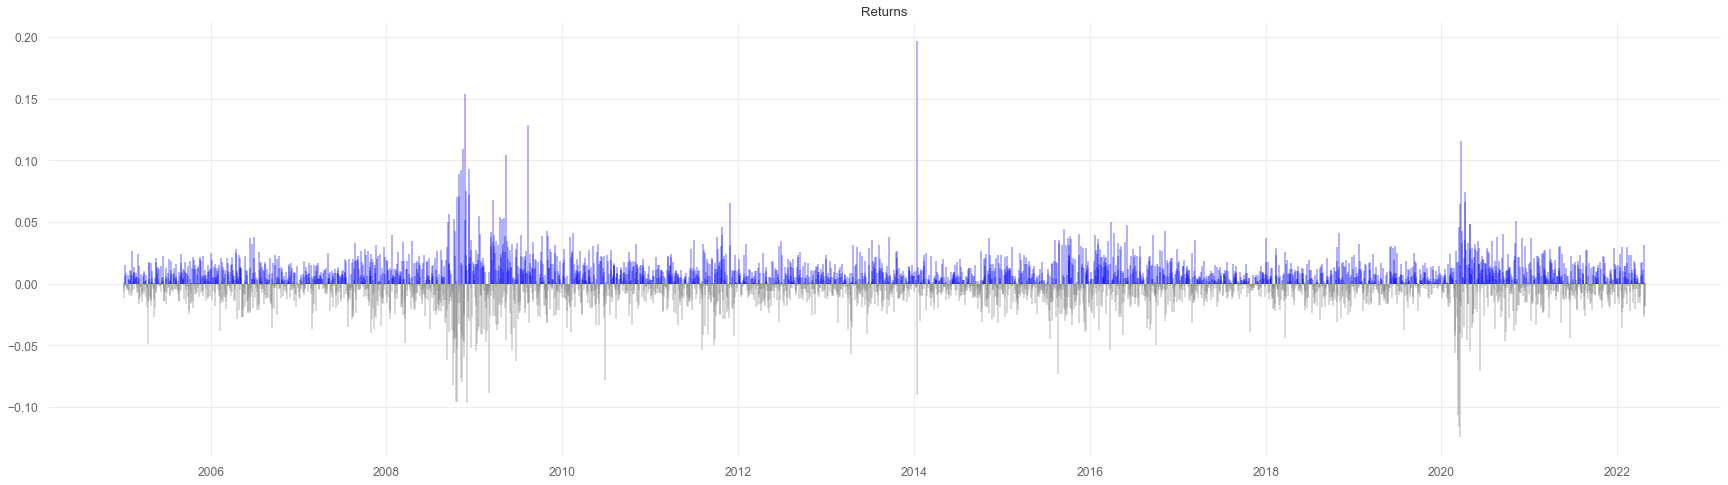

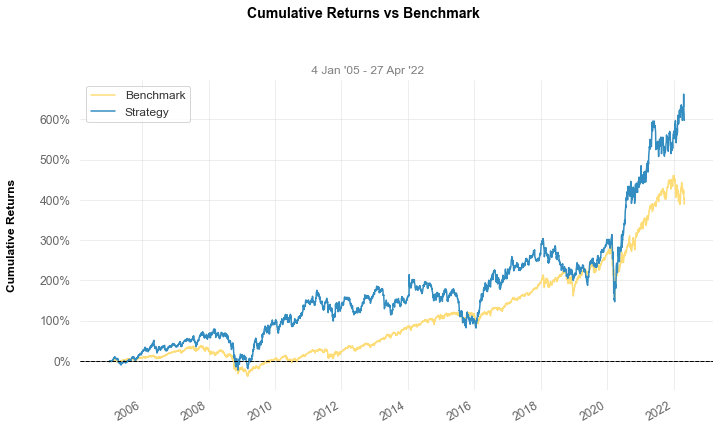

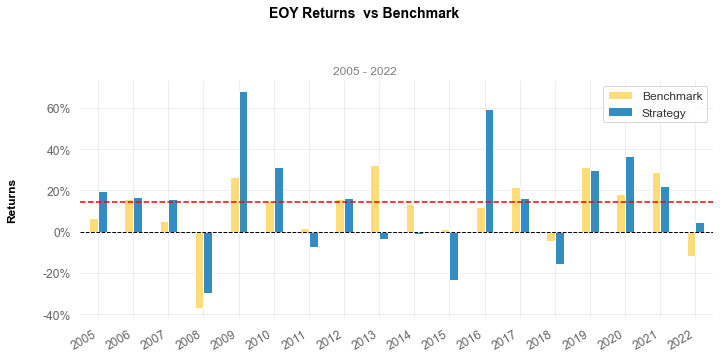

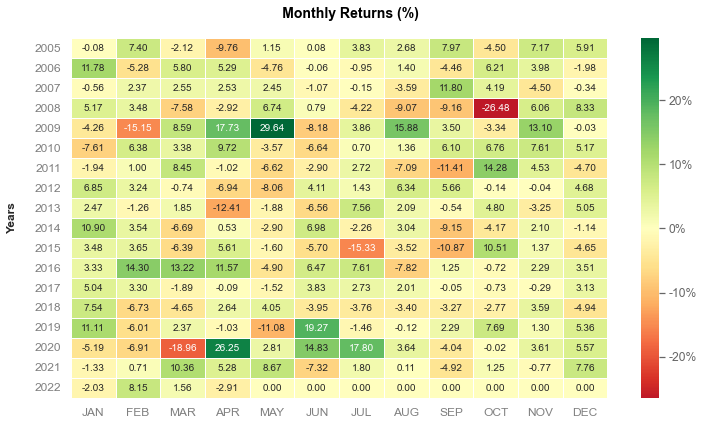

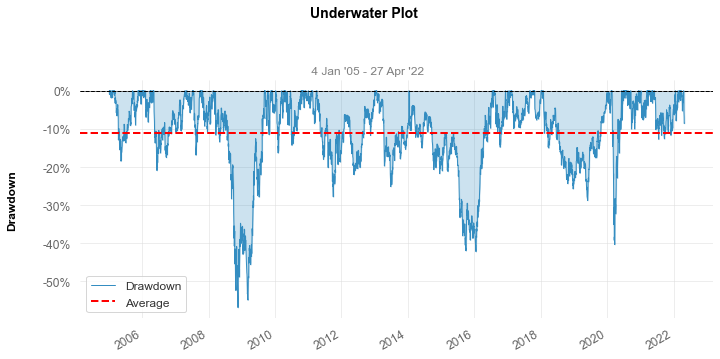

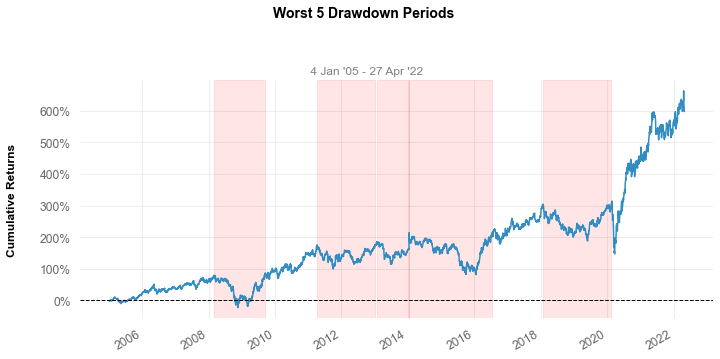

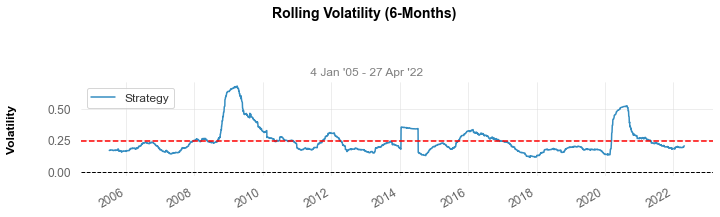

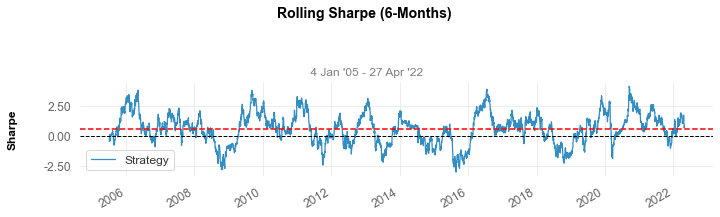

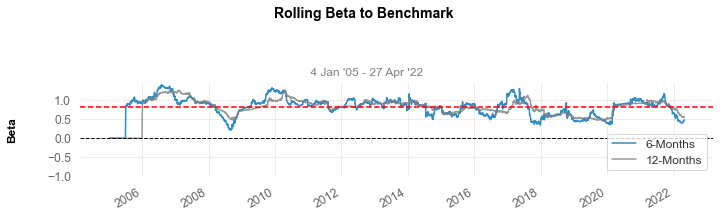

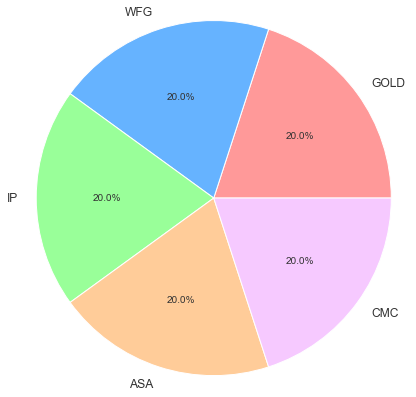

(None, None, None, None, None, None, None, None, None)

In [14]:
portfolio = Engine(
      start_date = "2005-01-01", 
      portfolio = ["GOLD", "WFG", "IP", "ASA", "CMC"], 
      weights = [0.2, 0.2, 0.2, 0.2, 0.2],
      benchmark = ["SPY"], #SPY is set by default
     
)

empyrial(portfolio)